# Исследование рынка компьютерных игр
Выявляем закономерность успешности компьютерных игр

## Введение

В этой работе анализируются закономерности влияющие на успешность игры. Анализ позволит компании продавцу компьютерных игр спланировать рекламную компанию на 2017 год. Датасет включает данные до 2016 года.

## Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np


from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)

## Шаг 1 – Импорт данных, общие сведения

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Всего в таблице 16715 строк. Есть много NaNов в столбцах Critic_Score, User_Score, Rating. Некоторые признаки требуют преобразования типов данных.

## Шаг 2 – Предобработка данных

In [5]:
#Переводим названия столбцов в нижний регистр
data.columns = [x.lower() for x in data.columns]

In [6]:
#Аббревеатура "tbd" означает "Будет определено позже", значит пока пользовательского рейтинга у игры нет, удаляю
data = data.query('user_score != "tbd"')

In [7]:
#Удаляю NaNы
data = data.dropna().reset_index(drop=True)

In [8]:
#Преобразуем данные в нужные типы
data['year_of_release'] = data['year_of_release'].astype('int') #переводим в int, чтобы извавиться от .0 в значении года
data['critic_score'] = data['critic_score'].astype('int') #переводим в int, т.к тут хранятся целочисленные значения
data['user_score'] = data['user_score'].astype('float') #тут значения имеют один знак после запятой, храним во флоат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6826 entries, 0 to 6825
Data columns (total 11 columns):
name               6826 non-null object
platform           6826 non-null object
year_of_release    6826 non-null int64
genre              6826 non-null object
na_sales           6826 non-null float64
eu_sales           6826 non-null float64
jp_sales           6826 non-null float64
other_sales        6826 non-null float64
critic_score       6826 non-null int64
user_score         6826 non-null float64
rating             6826 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 586.7+ KB


In [9]:
#Данные за 2016 год могут быть не полными, значит обрежем их
#data = data.query('year_of_release != 2016')

In [10]:
#Создадим столбец с суммарными продажами по Миру
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']



<font color='blue'> После удаления NaNов и строк со значением tbd, из 16713 осталось 6414 строк. Надеюсь, этого достаточно, чтобы выявить закономерность уcпешности игр.

## Шаг 3 – Исследовательский анализ данных

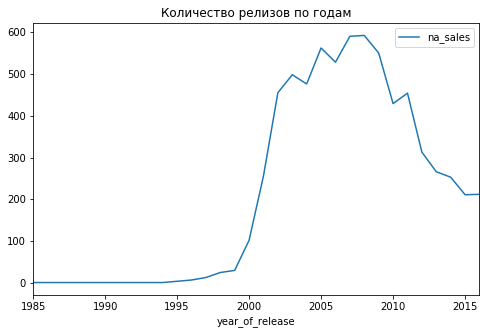

In [11]:
data.pivot_table(index='year_of_release', values='na_sales', aggfunc='count').plot(title='Количество релизов по годам')

<font color='blue'> Рынок игр начал экспоненциальное развитие в конце 90 годов. Достигнув пика 2009 году количество резилов снижается. Игр стали выпускать меньше.

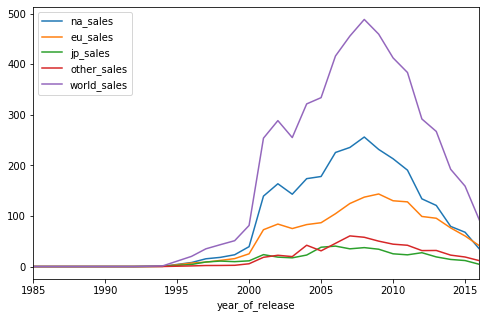

In [12]:
#Посмотрим продажи по регионам
sales_data = data[[x for x in data.columns if 'sales' in x] + ['year_of_release']]
sales_data.groupby('year_of_release').sum().plot()

<font color='blue'> До 2000 года индустрия видеоигр была в зачаточном состоянии, рынок еще не сформировался. Я думаю можно обрезать датафрейм ниже 2000 года.


In [13]:
data = data.query('year_of_release > 2000')

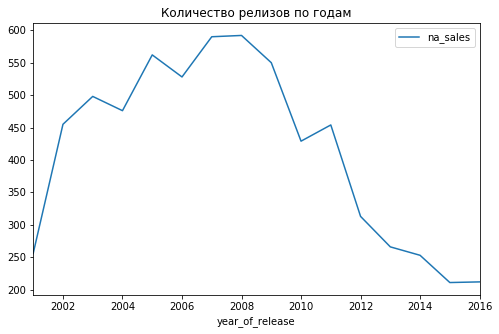

In [14]:
data.pivot_table(index='year_of_release', values='na_sales', aggfunc='count').plot(title='Количество релизов по годам')

<font color='blue'> И тут у меня зачесались руки попробовать Plotly

In [15]:
platforms_data = data.pivot_table(index='platform', values=('na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'world_sales'), aggfunc='sum').sort_values(by='jp_sales', ascending=False)


# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_data.index,
    y=platforms_data.na_sales,
    name='Продажи в Северной Америке'
)

trace1 = go.Bar(
    x=platforms_data.index,
    y=platforms_data.eu_sales,
    name='Продажи в Европе'
)

trace2 = go.Bar(
    x=platforms_data.index,
    y=platforms_data.jp_sales,
    name='Продажи в Японии'
)

trace3 = go.Bar(
    x=platforms_data.index,
    y=platforms_data.other_sales,
    name='Продажи других регионах'
)


# создаем массив с данными и задаем title для графика и оси x в layout
data_for_plot = [trace0, trace1, trace2, trace3]
layout = {'title': 'Продажи игр на разных платформах по регионам', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data_for_plot, layout=layout)
iplot(fig, show_link=False)

По суммарных продажам лидируют в Северной Америке и Европе лидируют PS2, X360, PS3. У пользователей из Японии вкусы отличаюnся. У них самые популярные платформы DS, PS2, PS3.

In [17]:
#Обрезаю выбросы
data_corr = data.query('world_sales < 4').sort_values(by='world_sales')

# создаем ящик с усами для каждой платформы из наших данных
data_box = []
for platform in data.platform.unique():
    data_box.append(go.Box(y=data_corr[data_corr.platform==platform].world_sales, name=platform))

# визуализируем данные
iplot(data_box, show_link = False)

<font color='blue'> Медианна продаж выше всего у платформы PS3, меньше всего приносят игры выпущенные на PC и DC.

In [18]:
data_top_platform = data.pivot_table(index='year_of_release',
                                      columns='platform', values='world_sales',
                                      aggfunc='sum')

#Собираем графики для каждой плотформы отдельно
PS2 = go.Scatter(
    x=data_top_platform.index,
    y=data_top_platform.PS2,
    name='PS2'
)

X360 = go.Scatter(
    x=data_top_platform.index,
    y=data_top_platform.X360,
    name='X360'
)

PS3 = go.Scatter(
    x=data_top_platform.index,
    y=data_top_platform.PS3,
    name='PS3'
)

Wii = go.Scatter(
    x=data_top_platform.index,
    y=data_top_platform.Wii,
    name='Wii'
)



DS = go.Scatter(
    x=data_top_platform.index,
    y=data_top_platform.DS,
    name='DS'
)

PS4 = go.Scatter(
    x=data_top_platform.index,
    y=data_top_platform.PS4,
    name='PS4'
)

XOne = go.Scatter(
    x=data_top_platform.index,
    y=data_top_platform.XOne,
    name='XOne'
)

WiiU = go.Scatter(
    x=data_top_platform.index,
    y=data_top_platform.WiiU,
    name='WiiU'
)

# определяем массив данных и задаем title графика в layout
data_for_plot2 = [PS2, X360, PS3, Wii, DS, PS4, XOne, WiiU]
layout = {'title': 'Продажи видеоигр на разных платформах в млн. $'}
# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data_for_plot2, layout=layout)
fig

<font color='blue'> Срок жизни платформы примерно 10 лет. Самая кассовая платформа PS2.

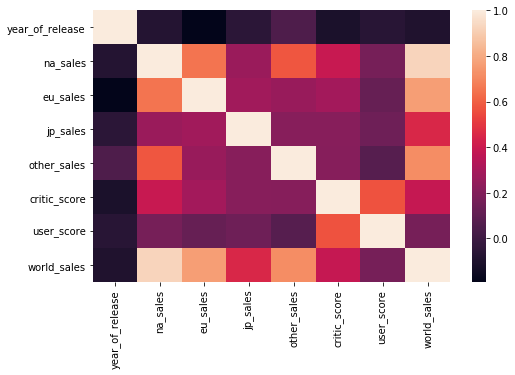

In [19]:
corr_matrix = data.query('platform =="PS2"').drop(['name', 'platform', 'genre', 'rating'], axis=1).corr()
sns.heatmap(corr_matrix)

In [20]:
corr_matrix

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
year_of_release,1.000000,-0.079234,-0.192082,-0.054619,0.054596,-0.106342,-0.062957,-0.090986
na_sales,-0.079234,1.000000,0.654116,0.265271,0.576571,0.390701,0.168165,0.927518
eu_sales,-0.192082,0.654116,1.000000,0.283590,0.263679,0.290712,0.122524,0.765060
jp_sales,-0.054619,0.265271,0.283590,1.000000,0.216031,0.215623,0.145848,0.454422
other_sales,0.054596,0.576571,0.263679,0.216031,1.000000,0.208706,0.074225,0.717207
critic_score,-0.106342,0.390701,0.290712,0.215623,0.208706,1.000000,0.568082,0.386704
user_score,-0.062957,0.168165,0.122524,0.145848,0.074225,0.568082,1.000000,0.169670
world_sales,-0.090986,0.927518,0.765060,0.454422,0.717207,0.386704,0.169670,1.000000


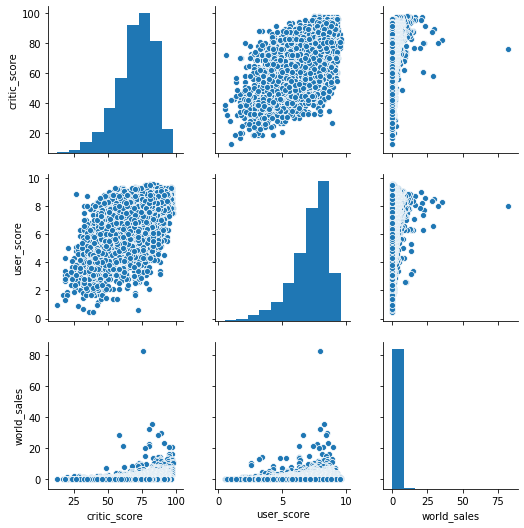

In [21]:
sns.pairplot(data.drop(['name', 'platform', 'genre', 
                    'rating', 'year_of_release', 'eu_sales', 'na_sales', 'jp_sales', 'other_sales'], axis=1))

<font color='blue'> Коореляция много инсайтов нам не даёт. Интересно, что если игра популярна в Северной Америке, то она популярна и в Европе, но совсем не в Японии. 

In [22]:
platforms_data = data.pivot_table(index='genre', values=('na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'world_sales'), aggfunc='sum').sort_values(by='world_sales', ascending=False)


# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_data.index,
    y=platforms_data.na_sales,
    name='Продажи в Северной Америке'
)

trace1 = go.Bar(
    x=platforms_data.index,
    y=platforms_data.eu_sales,
    name='Продажи в Европе'
)

trace2 = go.Bar(
    x=platforms_data.index,
    y=platforms_data.jp_sales,
    name='Продажи в Японии'
)

trace3 = go.Bar(
    x=platforms_data.index,
    y=platforms_data.other_sales,
    name='Продажи других регионах'
)


# создаем массив с данными и задаем title для графика и оси x в layout
data_for_plot = [trace0, trace1, trace2, trace3]
layout = {'title': 'Продажи игр на разных жанров по регионам', 'xaxis': {'title': 'Жанры'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data_for_plot, layout=layout)
iplot(fig, show_link=False)

<font color='blue'> Уже понятно, что у геймеров из Японии другие вкусы. В мире самые популярные жанры экшн, спорт, шутер, а у японцев ролевые, экшн и платформ.

## Шаг 4 – Портрет пользователя

In [23]:
na_platform = data.pivot_table(index='platform', 
                               values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

eu_platform = data.pivot_table(index='platform', 
                               values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

jp_platform = data.pivot_table(index='platform', 
                               values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

#Создаём переменные для лэйблов и значений
na_labels = na_platform.index
na_values = na_platform.na_sales

eu_labels = eu_platform.index
eu_values = eu_platform.eu_sales

jp_labels = jp_platform.index
jp_values = jp_platform.jp_sales



#Создаём сабплоты
fig = make_subplots(2, 2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Северная Америка', 'Европа', 'Япония'])

fig.add_trace(go.Pie(labels=na_labels, values=na_values, scalegroup='one',
                     name="Северная Америка"), 1, 1)

fig.add_trace(go.Pie(labels=eu_labels, values=eu_values, scalegroup='one',
                     name="Европа"), 1, 2)

fig.add_trace(go.Pie(labels=jp_labels, values=jp_values, scalegroup='one',
                     name="Япония"), 2, 1)





fig.update_layout(title_text='ТОП5 платформ в разных регионах')
fig.show()

In [24]:
na_platform = data.pivot_table(index='genre', 
                               values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

eu_platform = data.pivot_table(index='genre', 
                               values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

jp_platform = data.pivot_table(index='genre', 
                               values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

#Создаём переменные для лэйблов и значений
na_labels = na_platform.index
na_values = na_platform.na_sales

eu_labels = eu_platform.index
eu_values = eu_platform.eu_sales

jp_labels = jp_platform.index
jp_values = jp_platform.jp_sales



#Создаём сабплоты

fig = make_subplots(2, 2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Северная Америка', 'Европа', 'Япония'])

fig.add_trace(go.Pie(labels=na_labels, values=na_values, scalegroup='one',
                     name="Северная Америка"), 1, 1)

fig.add_trace(go.Pie(labels=eu_labels, values=eu_values, scalegroup='one',
                     name="Европа"), 1, 2)

fig.add_trace(go.Pie(labels=jp_labels, values=jp_values, scalegroup='one',
                     name="Япония"), 2, 1)





fig.update_layout(title_text='ТОП5 жанров в разных регионах')
fig.show()

In [25]:
platforms_data = data.pivot_table(index='rating', values=('na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'world_sales'), aggfunc='sum').sort_values(by='world_sales', ascending=False)


# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_data.index,
    y=platforms_data.na_sales,
    name='Продажи в Северной Америке'
)

trace1 = go.Bar(
    x=platforms_data.index,
    y=platforms_data.eu_sales,
    name='Продажи в Европе'
)

trace2 = go.Bar(
    x=platforms_data.index,
    y=platforms_data.jp_sales,
    name='Продажи в Японии'
)

trace3 = go.Bar(
    x=platforms_data.index,
    y=platforms_data.other_sales,
    name='Продажи других регионах'
)


# создаем массив с данными и задаем title для графика и оси x в layout
data_for_plot = [trace0, trace1, trace2, trace3]
layout = {'title': 'Влияние рейтинга ESRB на объём продаж по регионам', 'xaxis': {'title': 'Жанры'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data_for_plot, layout=layout)
iplot(fig, show_link=False)

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначены для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу. 

## Шаг 5 – Проверка гипотез

У нас на проверку есть 2 гипотезы.

 №1 – Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 
 №2 – Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

**Проверяем гипотезу №1** – Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Выдвигаем H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [27]:
data_xone = data.query('platform == "XOne"')
data_pc = data.query('platform == "PC"')

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    data_xone['user_score'], 
    data_pc['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.6582580354628004e-05
Отвергаем нулевую гипотезу


**Проверяем гипотезу №2** – Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Выдвигаем H0: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

In [23]:
data_action = data.query('genre == "Action"')
data_sport = data.query('genre == "Sports"')

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    data_action['user_score'], 
    data_sport['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.7961627772270626
Не получилось отвергнуть нулевую гипотезу


### Общий вывод

1. Рынок видеоигр переживает не лучше времена. Большие продажи были с 2005 по 2014. В 2008 был пик продажи и с того года рынок движется вниз.
2. Срок жизни новой платформы около 10 лет. 
3. PS4 и XOne платформы, которые появились в 2013 году и имеют потенциал для роста в 2017 году.
4. ТОП5 платформ по продажам в мире 1-PS2, 2-X360, 3-PS3, 4-Wii, 5-DS. При этом в разных регионах состав пятёрки меняется.
5. Сильной коореляции между рейтингом критиков, пользователей и продажами не замечено.
6. В Японии лучше всего продаются игры жанров: Role-Playing, Action, Platform.
7. В Северной Америке  ТОП3 жанра: Action, Sports, Shooter.
8. В Европе  ТОП3 жанра: Action, Shooter, Sports.
9. Больше продаж у игр с рейтингом  E, M, T. Плохо продаются игры с рейтингом: E10+, AO, RP.

**Дополнительные выводы**

Геймеры их Северной Америки, Европы и других стран солидарны в своих вкусах. Геймеры в Японии совершенно но похожи на геймеров из другого мира. Поэтому в Японии нужно менять ассортимент игр.

Самый большой рынок в Северной Америке и Европе. Там много денег. Много продаж.

Люди практически не покупают игры для взрослыз с рейтингом «AO» («Adults Only 18+»).